# Heart disease Hungarian

### 1) Pengumpulan data

Mengumpulkan data dari dataset dari link *https://archive.ics.uci.edu/dataset/45/heart+disease*. Database yang disediakan terdapat 4 database. Dan yang akan digunakan adalah dataset dengan nama file ``hungarian.data`` saja.
Dari deskripsi dataset di file ``hearth-disease.name`` terdapat beberapa informasi yang dapat didapatkan. Yang diantaranya adalah di dalam dataset terdapat 76 atribut tetapi yang digunakan hanya 14. Tujuan dari dataset ini untuk melakukan klasifikasi adanya penyakit jantung pada pasien. 


### 2) Menelaah data


Memasukkan library yang digunakan untuk menelaah data

In [10]:
import numpy as np
import pandas as pd
import re
import itertools

Membuka data dari drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
# !ls '/content/drive/MyDrive/BK'
!dir data

 Volume in drive F is DATA2
 Volume Serial Number is 603C-0EEB

 Directory of f:\Project\code\hearth-disease\data

28/12/2023  13:23    <DIR>          .
28/12/2023  13:23    <DIR>          ..
22/05/2023  08:24               587 ask-detrano
22/05/2023  08:24             6.737 bak
22/05/2023  08:24            23.941 cleve.mod
22/05/2023  08:24            60.669 cleveland.data
28/12/2023  13:23    <DIR>          costs
22/05/2023  08:24            10.060 heart-disease.names
22/05/2023  08:24            62.192 hungarian.data
22/05/2023  08:24               644 Index
22/05/2023  08:24            39.892 long-beach-va.data
22/05/2023  08:24           389.771 new.data
22/05/2023  08:24            18.461 processed.cleveland.data
22/05/2023  08:24            10.263 processed.hungarian.data
22/05/2023  08:24             4.109 processed.switzerland.data
22/05/2023  08:24             6.737 processed.va.data
22/05/2023  08:24            11.058 reprocessed.hungarian.data
22/05/2023  08:24            2

memasukkan dataset yang dibutuhkan dengan alamat dan simpan kedalam sebuah variable

In [12]:
## dir = '/content/drive/MyDrive/BK/hungarian.data'
dir = 'data/hungarian.data'

buat iterasi untuk membaca dataset

In [13]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:1]

['1254 0 40 1 1 0 0']

melakukan iterasi sesuai dengan jumlah kolom, dan baris yang ada pada dataset. Atribut yang ada di dataset terdapat 76. Jadi membuat iterasi untuk menggabungkan 76 atribut yang ada di 10 kolom menjadi satu baris sesuai dengan dataset yang ada di file `hungarian.data`. Kemudian disimpan kedalam DataFrame

In [16]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range (0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.tail()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
289,1053,0,48,0,0,0,0,-9,2,-9,...,-9,-9,1,1,1,1,1,-9.,-9.,name
290,1054,0,36,1,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
291,5001,0,48,1,0,0,0,-9,3,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
292,5000,0,47,0,0,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
293,5002,0,53,1,1,1,1,-9,4,130,...,1,1,1,1,1,1,1,-9.,-9.,name


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

kondisi dataset yang dimiliki saat ini terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data  untuk tipe data object atau string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [18]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

mengubah tipedata file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [19]:
df = df.astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

### 3) Validasi Data

Tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya. Di dalam dataset ini, nilai null nya dilambangkan dengan angka `-9.0`. Di tahap ini juga untuk mengetahui berapa banyak nilai nan.

Mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset.

In [21]:
df.replace(-9.0, np.nan, inplace=True)

menghitung jumlah nilai null value

In [22]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [55]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

### 4) Menentukan Objek Data

Sesuai dengan deskripsi dataset, fitur yang akan digunakan 14 fitur saja dari 76 fitur.

membuat variable dataframe baru untuk fitur mana saja yang akan digunakan. 

Karena kolom dimulai dengan nilai 0, maka 

In [31]:
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [32]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [33]:
df_selected.tail()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,NaN,NaN,NaN,0.0


In [34]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [35]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

In [36]:
df_selected.rename(columns=column_mapping, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16980\3799284956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [37]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [38]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
Name: count, dtype: int64

### 5) Membersihkan Data

Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat

menghitung jumlah null values yang ada di dalam dataset

In [39]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Berdasarkan output kode program diatas ada beberapa fitur yang hampir 90% datanya memiliki nilai null sehingga perlu dilakukan
penghapusan fitur menggunakan fungsi drop

In [40]:
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [41]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['thalach'].dropna()
meanthalach = df_selected['restecg'].dropna()
meanexang = df_selected['exang'].dropna()

In [42]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)


In [43]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [44]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [45]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [46]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Melakukan pengecekan terhadap duplikasi data

In [47]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [48]:
print("All duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menghapus data yang memiliki duplikat

In [49]:
dfClean = dfClean.drop_duplicates()
print("All duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [50]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [51]:
dfClean['target'].value_counts()

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

Mencari korelasi antar fitur

In [53]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.056645,-0.435788,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,0.029697,-0.069999,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.121583,-0.328200,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.025111,-0.172258,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.042499,-0.132148,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,-0.013116,-0.060751,0.115503,0.063179,0.154319
restecg,0.056645,0.029697,-0.121583,0.025111,0.042499,-0.013116,1.000000,-0.007590,-0.036309,-0.035504,0.106794
thalach,-0.435788,-0.069999,-0.328200,-0.172258,-0.132148,-0.060751,-0.007590,1.000000,-0.366032,-0.313698,-0.335178
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,-0.036309,-0.366032,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,-0.035504,-0.313698,0.624965,1.000000,0.580732


<Axes: >

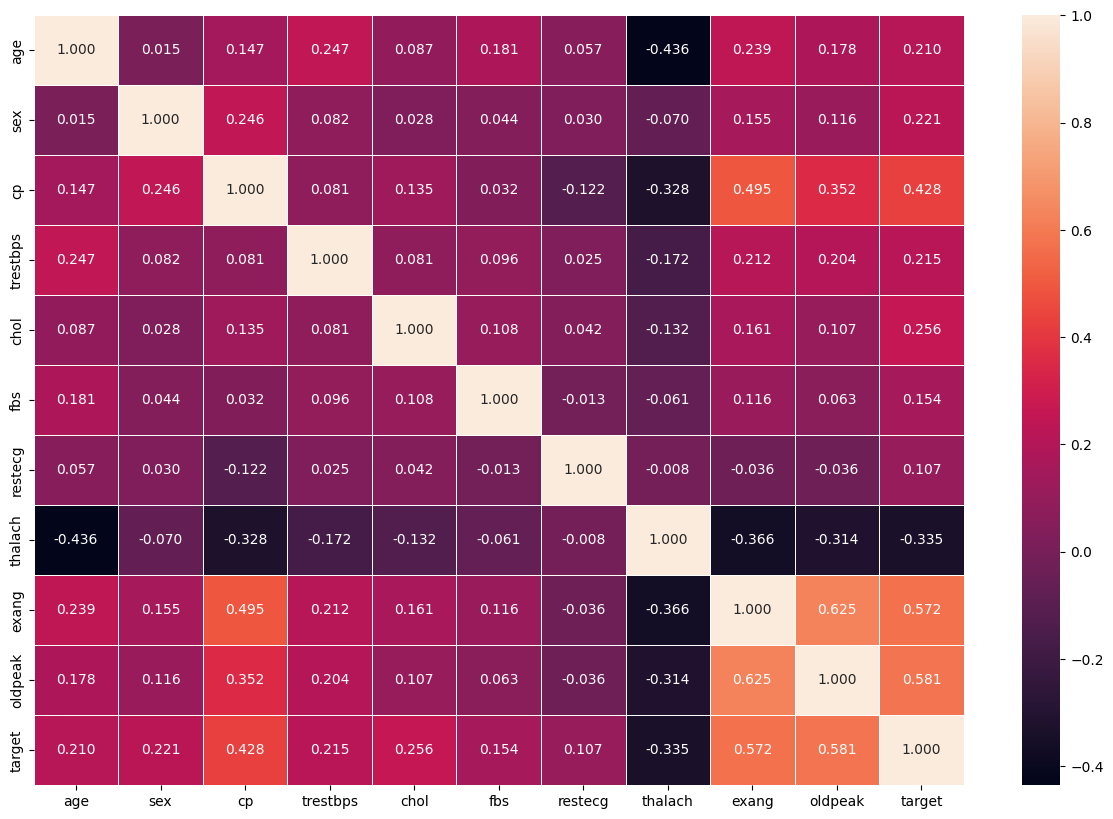

In [61]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")